# 1. Introduction

Due to the rising awareness of environmental protection, people are intending to purchase electric car. By the end of 2020, there are more than 10 million light-duty plug-in vehicles in use globally. Europe is taking 30% of that figure. [1] Germany is certainly taking the lead of this trend, by having over 700,000 plug-in passenger cars at the end of 200. 

Charging station, depending on its location, usage, accessibility for different chargers, is playing a vital role in electric car infrastructural facilities. Given the optimistic trend of electric cars, it is certainly needed to speed up the installation of charging infrastructure in order to match the rocket-speed growth of use of electric cars.

Hamburg is the second largest city in Germany after Berlin and 7th largest city in the European Union with a population of over 1.84 million. Hamburg has been one of the pioneers in e-mobility for years. With over 1,000 publicly accessible charging points, the Free and Hanseatic City is one of the German cities with the most extensive charging infrastructure. There are almost 28,000 publicly accessible charging points throughout Germany (as of June 2020).[2] As part of the ELBE-project, Hamburg is aiming at adding over 7400 charging stations by end of 2022. 

# 2. Business Problem

In order to reach the ambicious aim, this report would like to offer some insipration for the choose of location of charging station in Hamburg. According to Master plan for charging infrastructure for the Federal Republic[3], 60-85% chargingstation would belong to private buildings or company buildings, with regular or nightcharging type. Meanwhile, 15-40% charging station will be at shops, roads, public parking place (e.g. in shopping center), with fast charging type. For fast charging type is the fastest way to charge your electric vehicle, providing between 60-200 miles of range in 20-30 mins. 


In public venues, supermarket and shopping mall are the most visited venues, where people will go with cars and the customer dwell time in supermarket and shopping malls is normally more than 30 min. 

Therefore, this report is going to focus on the research question: the distribution of the supermarket and shopping mall in Hamburg, and accoordingly to suggest the locaiton of fast charging station. 



# 3. Data Preparation

In [384]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
pd.set_option('display.max_row', None)

import json

!conda install -c conda-forge geopy --yes
from geopy.geocoders import Nominatim

import requests
from pandas.io.json import json_normalize

import matplotlib.cm as cm
import matplotlib.colors as colors

from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes
import folium


print('libraries are loaded!')


Solving environment: done

# All requested packages already installed.

Solving environment: done

# All requested packages already installed.

libraries are loaded!


## 3.1 Using BeautifulSoup to get the Neiborhood information from Wikipedia

In [296]:
!pip install bs4 
from bs4 import BeautifulSoup

In [297]:
link ='https://de.wikipedia.org/wiki/Liste_der_Bezirke_und_Stadtteile_Hamburgs'
data = requests.get(link).text
soup = BeautifulSoup(data, 'html5lib')
tables = soup.find_all('table')
data_Hamburg1 = pd.read_html(str(tables[1]), flavor ='bs4')[0]
data_Hamburg1.head()

Stadtteil Ortsteile         Bezirk  Fläche (km²)  Einwohner  \
0  Hamburg-Altstadt   101–102  Hamburg-Mitte            24   2350.000   
1         HafenCity   103–104  Hamburg-Mitte            22   4925.000   
2          Neustadt   105–108  Hamburg-Mitte            23     12.762   
3         St. Pauli   109–112  Hamburg-Mitte            25     22.097   
4         St. Georg   113–114  Hamburg-Mitte            24     11.358   

   Bevölkerungs­dichte (Einwohner/km²)                  Koordinaten  Karte  
0                                  979    53° 33′ 0″ N, 10° 0′ 0″ O    NaN  
1                                 2239   53° 32′ 28″ N, 10° 0′ 1″ O    NaN  
2                                 5549    53° 33′ 7″ N, 9° 59′ 8″ O    NaN  
3                                 8839  53° 33′ 25″ N, 9° 57′ 50″ O    NaN  
4                                 4733  53° 33′ 18″ N, 10° 0′ 44″ O    NaN

In [298]:
import re

def dms2dd(degrees, minutes, seconds, direction):
    dd = float(degrees) + float(minutes)/60 + float(seconds)/(60*60);
    if direction == 'S' or direction == 'W':
        dd *= -1
    return dd;

def dd2dms(deg):
    d = int(deg)
    md = abs(deg - d) * 60
    m = int(md)
    sd = (md - m) * 60
    return [d, m, sd]

def parse_dms(dms):
    parts = re.split('[^\d\w]+', dms)
    lat = dms2dd(parts[0], parts[1], parts[2], parts[3])
    lng = dms2dd(parts[4], parts[5], parts[6], parts[7])

    return (lat, lng)

dd = parse_dms("36°57'9' N 110°4'21' W")

print(dd)
print(dd2dms(dd[0]))


(36.9525, -110.07249999999999)
[36, 57, 9.000000000002046]


In [299]:
df=[]
for value in data_Hamburg1['Koordinaten']:
    coordinates = parse_dms(value)
    df.append({'coordinates': coordinates})

df = pd.DataFrame(df)

df.head()


coordinates
0                            (53.55, 10.0)
1  (53.54111111111111, 10.000277777777777)
2  (53.551944444444445, 9.985555555555555)
3   (53.55694444444444, 9.963888888888889)
4             (53.555, 10.012222222222222)

In [300]:
df = df.astype(str)
df.sample(5)

coordinates
92     (53.43722222222222, 9.98611111111111)
47  (53.572500000000005, 10.018611111111111)
76              (53.42472222222222, 10.2625)
89   (53.44916666666666, 10.015277777777778)
29    (53.55833333333333, 9.811111111111112)

In [301]:
df[['Lat', 'Long']] = df['coordinates'].str.split(',', 1, expand=True)

In [302]:
df.head()

coordinates                  Lat  \
0                            (53.55, 10.0)               (53.55   
1  (53.54111111111111, 10.000277777777777)   (53.54111111111111   
2  (53.551944444444445, 9.985555555555555)  (53.551944444444445   
3   (53.55694444444444, 9.963888888888889)   (53.55694444444444   
4             (53.555, 10.012222222222222)              (53.555   

                   Long  
0                 10.0)  
1   10.000277777777777)  
2    9.985555555555555)  
3    9.963888888888889)  
4   10.012222222222222)

In [303]:
Lat = []

for i in df['Lat']:
    l = i.replace('(', '')
    Lat.append({'Lat': l})

Lat = pd.DataFrame(Lat)

In [304]:
Lat.head()

Lat
0               53.55
1   53.54111111111111
2  53.551944444444445
3   53.55694444444444
4              53.555

In [305]:
Long = []

for i in df['Long']:
    l = i.replace(')', '')
    Long.append({'Long': l})

Long = pd.DataFrame(Long)

In [166]:
Long.head()

Long
0                 10.0
1   10.000277777777777
2    9.985555555555555
3    9.963888888888889
4   10.012222222222222

In [306]:
result = pd.concat([Lat, Long], axis=1)
result.head()

Lat                 Long
0               53.55                 10.0
1   53.54111111111111   10.000277777777777
2  53.551944444444445    9.985555555555555
3   53.55694444444444    9.963888888888889
4              53.555   10.012222222222222

In [307]:
result['Lat'] = result['Lat'].astype(float)
result['Long'] = result['Long'].astype(float)


In [308]:
result.head()

Lat       Long
0  53.550000  10.000000
1  53.541111  10.000278
2  53.551944   9.985556
3  53.556944   9.963889
4  53.555000  10.012222

In [309]:
data = pd.concat([data_Hamburg1, result], axis=1)

In [310]:
data.head()

Stadtteil Ortsteile         Bezirk  Fläche (km²)  Einwohner  \
0  Hamburg-Altstadt   101–102  Hamburg-Mitte            24   2350.000   
1         HafenCity   103–104  Hamburg-Mitte            22   4925.000   
2          Neustadt   105–108  Hamburg-Mitte            23     12.762   
3         St. Pauli   109–112  Hamburg-Mitte            25     22.097   
4         St. Georg   113–114  Hamburg-Mitte            24     11.358   

   Bevölkerungs­dichte (Einwohner/km²)                  Koordinaten  Karte  \
0                                  979    53° 33′ 0″ N, 10° 0′ 0″ O    NaN   
1                                 2239   53° 32′ 28″ N, 10° 0′ 1″ O    NaN   
2                                 5549    53° 33′ 7″ N, 9° 59′ 8″ O    NaN   
3                                 8839  53° 33′ 25″ N, 9° 57′ 50″ O    NaN   
4                                 4733  53° 33′ 18″ N, 10° 0′ 44″ O    NaN   

         Lat       Long  
0  53.550000  10.000000  
1  53.541111  10.000278  
2  53.551944   9.985556  
3  53.556944   9.963889  
4  53.555000  10.012222

In [311]:
data_Hamburg_stadt = data.drop(columns = ['Ortsteile', 'Fläche (km²)', 'Einwohner', 'Karte', 'Koordinaten'], inplace = False)
data_Hamburg_stadt.head()

Stadtteil         Bezirk  Bevölkerungs­dichte (Einwohner/km²)  \
0  Hamburg-Altstadt  Hamburg-Mitte                                  979   
1         HafenCity  Hamburg-Mitte                                 2239   
2          Neustadt  Hamburg-Mitte                                 5549   
3         St. Pauli  Hamburg-Mitte                                 8839   
4         St. Georg  Hamburg-Mitte                                 4733   

         Lat       Long  
0  53.550000  10.000000  
1  53.541111  10.000278  
2  53.551944   9.985556  
3  53.556944   9.963889  
4  53.555000  10.012222

In [312]:
data_Hamburg_stadt.shape

(104, 5)

In [313]:
data_Hamburg_stadt = data_Hamburg_stadt.rename(columns={
    'Stadtteil':"Neighborhood", 
    'Bezirk': 'Borough', 
    'Bevölkerungs­dichte (Einwohner/km²)': 'Dencity of Population(people/km²)', 
    'Lat': 'Latitude', 
    'Long': 'Longitude'})


In [314]:
data_Hamburg_stadt.head()

Neighborhood        Borough  Dencity of Population(people/km²)  \
0  Hamburg-Altstadt  Hamburg-Mitte                                979   
1         HafenCity  Hamburg-Mitte                               2239   
2          Neustadt  Hamburg-Mitte                               5549   
3         St. Pauli  Hamburg-Mitte                               8839   
4         St. Georg  Hamburg-Mitte                               4733   

    Latitude  Longitude  
0  53.550000  10.000000  
1  53.541111  10.000278  
2  53.551944   9.985556  
3  53.556944   9.963889  
4  53.555000  10.012222

## 3.2 Download and Clean up the Fast Charging Station Information

In [342]:
data_Hamburg_stadt.to_csv('data_Hamburg_stadt.csv')

In [343]:
data_chargingstation = pd.read_excel('Ladesaeulenkarte_Datenbankauszug.xlsx', index_col= 0)
data_1 = data_chargingstation.drop(data_chargingstation.index[[0,1,2,3]])

new_header = data_1.iloc[0]
data_chargingstation = data_1[1:]
data_chargingstation.columns = new_header

data_chargingstation.head()


Betreiber                                            Adresse  \
Ladesäulenregister Bundesnetzagentur                           
Albwerk GmbH & Co. KG                         Ennabeurer Weg   
Albwerk GmbH & Co. KG                 Parkplatz Campingplatz   
EnBW Energie Baden-Württemberg               Hauptstraße 91c   
SWU Energie GmbH                      Helfensteinerstraße 12   
Stadtwerke Eichstätt                              Burgstraße   

Betreiber                                       Postleitzahl Ort  \
Ladesäulenregister Bundesnetzagentur                               
Albwerk GmbH & Co. KG                          72535 Heroldstatt   
Albwerk GmbH & Co. KG                           72589 Westerheim   
EnBW Energie Baden-Württemberg                   73340 Amstetten   
SWU Energie GmbH                      80143 Blaubeuren-Gerhausen   
Stadtwerke Eichstätt                             85072 Eichstätt   

Betreiber                                    Bundesland  \
Ladesäulenregister Bundesnetzagentur                      
Albwerk GmbH & Co. KG                 Baden-Württemberg   
Albwerk GmbH & Co. KG                 Baden-Württemberg   
EnBW Energie Baden-Württemberg        Baden-Württemberg   
SWU Energie GmbH                      Baden-Württemberg   
Stadtwerke Eichstätt                  Baden-Württemberg   

Betreiber                                             Landkreis  \
Ladesäulenregister Bundesnetzagentur                              
Albwerk GmbH & Co. KG                 Landkreis Alb-Donau-Kreis   
Albwerk GmbH & Co. KG                 Landkreis Alb-Donau-Kreis   
EnBW Energie Baden-Württemberg        Landkreis Alb-Donau-Kreis   
SWU Energie GmbH                      Landkreis Alb-Donau-Kreis   
Stadtwerke Eichstätt                  Landkreis Alb-Donau-Kreis   

Betreiber                            Längengrad [DG] Breitengrad [DG]  \
Ladesäulenregister Bundesnetzagentur                                    
Albwerk GmbH & Co. KG                        9.65907          48.4424   
Albwerk GmbH & Co. KG                          9.609          48.5105   
EnBW Energie Baden-Württemberg               9.87484          48.5785   
SWU Energie GmbH                             9.80557           48.399   
Stadtwerke Eichstätt                         10.1036          48.5331   

Betreiber                             Inbetriebnahmedatum  \
Ladesäulenregister Bundesnetzagentur                        
Albwerk GmbH & Co. KG                 2020-01-11 00:00:00   
Albwerk GmbH & Co. KG                 2019-01-07 00:00:00   
EnBW Energie Baden-Württemberg        2019-03-19 00:00:00   
SWU Energie GmbH                      2019-04-13 00:00:00   
Stadtwerke Eichstätt                  2020-12-15 00:00:00   

Betreiber                            Anschlussleistung [kW]  \
Ladesäulenregister Bundesnetzagentur                          
Albwerk GmbH & Co. KG                                    22   
Albwerk GmbH & Co. KG                                    22   
EnBW Energie Baden-Württemberg                           98   
SWU Energie GmbH                                         22   
Stadtwerke Eichstätt                                     22   

Betreiber                            Art der Ladeeinrichtung  \
Ladesäulenregister Bundesnetzagentur                           
Albwerk GmbH & Co. KG                  Normalladeeinrichtung   
Albwerk GmbH & Co. KG                  Normalladeeinrichtung   
EnBW Energie Baden-Württemberg        Schnellladeeinrichtung   
SWU Energie GmbH                       Normalladeeinrichtung   
Stadtwerke Eichstätt                   Normalladeeinrichtung   

Betreiber                            Anzahl Ladepunkte       Steckertypen1  \
Ladesäulenregister Bundesnetzagentur                                         
Albwerk GmbH & Co. KG                                2  AC Steckdose Typ 2   
Albwerk GmbH & Co. KG                                2  AC Steckdose Typ 2   
EnBW Energie Baden-Württemberg                 

In [346]:
data_chargingstation_Hamburg = data_chargingstation.loc[data_chargingstation['Bundesland']=='Hamburg']
data_chargingstation_Hamburg = data_chargingstation_Hamburg.drop(['Adresse', 'Inbetriebnahmedatum', 'Postleitzahl Ort', 'Landkreis'], axis
                                         =1, inplace=False)

data_chargingstation_Hamburg.head()

Betreiber                            Bundesland Längengrad [DG]  \
Ladesäulenregister Bundesnetzagentur                              
Stromnetz Hamburg GmbH                  Hamburg          9.9976   
Stromnetz Hamburg GmbH                  Hamburg         10.0047   
Stromnetz Hamburg GmbH                  Hamburg         10.0011   
Stromnetz Hamburg GmbH                  Hamburg         10.0011   
Stromnetz Hamburg GmbH                  Hamburg         9.99313   

Betreiber                            Breitengrad [DG] Anschlussleistung [kW]  \
Ladesäulenregister Bundesnetzagentur                                           
Stromnetz Hamburg GmbH                        53.5522                     44   
Stromnetz Hamburg GmbH                        53.5494                     44   
Stromnetz Hamburg GmbH                        53.5526                     44   
Stromnetz Hamburg GmbH                        53.5553                     44   
Stromnetz Hamburg GmbH                        53.5489                     44   

Betreiber                            Art der Ladeeinrichtung  \
Ladesäulenregister Bundesnetzagentur                           
Stromnetz Hamburg GmbH                 Normalladeeinrichtung   
Stromnetz Hamburg GmbH                 Normalladeeinrichtung   
Stromnetz Hamburg GmbH                 Normalladeeinrichtung   
Stromnetz Hamburg GmbH                 Normalladeeinrichtung   
Stromnetz Hamburg GmbH                 Normalladeeinrichtung   

Betreiber                            Anzahl Ladepunkte  \
Ladesäulenregister Bundesnetzagentur                     
Stromnetz Hamburg GmbH                               2   
Stromnetz Hamburg GmbH                               2   
Stromnetz Hamburg GmbH                               2   
Stromnetz Hamburg GmbH                               2   
Stromnetz Hamburg GmbH                               2   

Betreiber                                             Steckertypen1 P1 [kW]  \
Ladesäulenregister Bundesnetzagentur                                          
Stromnetz Hamburg GmbH                AC Steckdose Typ 2, AC Schuko      22   
Stromnetz Hamburg GmbH                AC Steckdose Typ 2, AC Schuko      22   
Stromnetz Hamburg GmbH                AC Steckdose Typ 2, AC Schuko      22   
Stromnetz Hamburg GmbH                AC Steckdose Typ 2, AC Schuko      22   
Stromnetz Hamburg GmbH                AC Steckdose Typ 2, AC Schuko      22   

Betreiber                            Public Key1  \
Ladesäulenregister Bundesnetzagentur               
Stromnetz Hamburg GmbH                       NaN   
Stromnetz Hamburg GmbH                       NaN   
Stromnetz Hamburg GmbH                       NaN   
Stromnetz Hamburg GmbH                       NaN   
Stromnetz Hamburg GmbH                       NaN   

Betreiber                                             Steckertypen2 P2 [kW]  \
Ladesäulenregister Bundesnetzagentur                                          
Stromnetz Hamburg GmbH                AC Steckdose Typ 2, AC Schuko      22   
Stromnetz Hamburg GmbH                AC Steckdose Typ 2, AC Schuko      22   
Stromnetz Hamburg GmbH                AC Steckdose Typ 2, AC Schuko      22   
Stromnetz Hamburg GmbH                AC Steckdose Typ 2, AC Schuko      22   
Stromnetz Hamburg GmbH                AC Steckdose Typ 2, AC Schuko      22   

Betreiber                            Public Key2 Steckertypen3 P3 [kW]  \
Ladesäulenregister Bundesnetzagentur                                     
Stromnetz Hamburg GmbH                       NaN           NaN     NaN   
Stromnetz Hamburg GmbH                       NaN           NaN     NaN   
Stromnetz Hamburg GmbH                       NaN           NaN     NaN   
Stromnetz Hamburg GmbH                       NaN           NaN     NaN   
Stromnetz Hamburg GmbH                       NaN           NaN     NaN   

Betreiber                            Public Key3 Steckertypen4 P4 [kW]  \
Ladesäulenregister Bundesnetzagentur           

In [348]:
data_fast_charging = data_chargingstation_Hamburg.loc[data_chargingstation_Hamburg['Art der Ladeeinrichtung'] == 'Schnellladeeinrichtung']
data_fast_charging.head()

Betreiber                            Bundesland Längengrad [DG]  \
Ladesäulenregister Bundesnetzagentur                              
Stromnetz Hamburg GmbH                  Hamburg         10.0137   
Stromnetz Hamburg GmbH                  Hamburg         10.0124   
Stromnetz Hamburg GmbH                  Hamburg         10.0236   
Stromnetz Hamburg GmbH                  Hamburg         10.0082   
Stromnetz Hamburg GmbH                  Hamburg         9.99472   

Betreiber                            Breitengrad [DG] Anschlussleistung [kW]  \
Ladesäulenregister Bundesnetzagentur                                           
Stromnetz Hamburg GmbH                        53.5483                     61   
Stromnetz Hamburg GmbH                        53.5447                     61   
Stromnetz Hamburg GmbH                        53.5531                     61   
Stromnetz Hamburg GmbH                         53.553                     61   
Stromnetz Hamburg GmbH                        53.5705                     61   

Betreiber                            Art der Ladeeinrichtung  \
Ladesäulenregister Bundesnetzagentur                           
Stromnetz Hamburg GmbH                Schnellladeeinrichtung   
Stromnetz Hamburg GmbH                Schnellladeeinrichtung   
Stromnetz Hamburg GmbH                Schnellladeeinrichtung   
Stromnetz Hamburg GmbH                Schnellladeeinrichtung   
Stromnetz Hamburg GmbH                Schnellladeeinrichtung   

Betreiber                            Anzahl Ladepunkte  \
Ladesäulenregister Bundesnetzagentur                     
Stromnetz Hamburg GmbH                               2   
Stromnetz Hamburg GmbH                               2   
Stromnetz Hamburg GmbH                               2   
Stromnetz Hamburg GmbH                               2   
Stromnetz Hamburg GmbH                               2   

Betreiber                                             Steckertypen1 P1 [kW]  \
Ladesäulenregister Bundesnetzagentur                                          
Stromnetz Hamburg GmbH                DC Kupplung Combo, DC CHAdeMO      50   
Stromnetz Hamburg GmbH                DC Kupplung Combo, DC CHAdeMO      50   
Stromnetz Hamburg GmbH                DC Kupplung Combo, DC CHAdeMO      50   
Stromnetz Hamburg GmbH                DC Kupplung Combo, DC CHAdeMO      50   
Stromnetz Hamburg GmbH                DC Kupplung Combo, DC CHAdeMO      50   

Betreiber                            Public Key1       Steckertypen2 P2 [kW]  \
Ladesäulenregister Bundesnetzagentur                                           
Stromnetz Hamburg GmbH                       NaN  AC Steckdose Typ 2      11   
Stromnetz Hamburg GmbH                       NaN  AC Steckdose Typ 2      11   
Stromnetz Hamburg GmbH                       NaN  AC Steckdose Typ 2      11   
Stromnetz Hamburg GmbH                       NaN  AC Steckdose Typ 2      11   
Stromnetz Hamburg GmbH                       NaN  AC Steckdose Typ 2      11   

Betreiber                            Public Key2 Steckertypen3 P3 [kW]  \
Ladesäulenregister Bundesnetzagentur                                     
Stromnetz Hamburg GmbH                       NaN           NaN     NaN   
Stromnetz Hamburg GmbH                       NaN           NaN     NaN   
Stromnetz Hamburg GmbH                       NaN           NaN     NaN   
Stromnetz Hamburg GmbH                       NaN           NaN     NaN   
Stromnetz Hamburg GmbH                       NaN           NaN     NaN   

Betreiber                            Public Key3 Steckertypen4 P4 [kW]  \
Ladesäulenregister Bundesnetzagentur                                     
Stromnetz Hamburg GmbH                       NaN           NaN     NaN   
Stromnetz Hamburg GmbH                       NaN           NaN     NaN   
Stromnetz Hamburg GmbH                       NaN           NaN     NaN   
Stromnetz Hamburg GmbH                       NaN           NaN     NaN   
Stromnetz Hamburg GmbH             

## 3.3 Use Foursquare API to Explore Popular Venues in the Neighborhood of Hamburg

In [315]:
CLIENT_ID = 'RQEK1FE0KCZYXH01ESL5UUYU55PLDDB0ITEUU5BLTWLRXEIM' # your Foursquare ID
CLIENT_SECRET = 'BMFMAPT2HRBI1TUHVLWCMVIOXOMODHEQU2G5MM1UBO4ZBU31' # your Foursquare Secret
ACCESS_TOKEN = 'KWMPI4RYSZ2WY1TOAXDXLSDI2JHJDPSMKR0YBLSY1CHGYJQ3' # your FourSquare Access Token
VERSION = '20210520'
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: RQEK1FE0KCZYXH01ESL5UUYU55PLDDB0ITEUU5BLTWLRXEIM
CLIENT_SECRET:BMFMAPT2HRBI1TUHVLWCMVIOXOMODHEQU2G5MM1UBO4ZBU31


In [316]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    return(nearby_venues)

In [317]:
LIMIT = 100
radius = 1000

Hamburg_venues = getNearbyVenues(names=data_Hamburg_stadt['Neighborhood'],
                                  latitudes=data_Hamburg_stadt['Latitude'],
                                  longitudes=data_Hamburg_stadt['Longitude'], 
                                radius = radius)

Hamburg-Altstadt
HafenCity
Neustadt
St. Pauli
St. Georg
Hammerbrook
Borgfelde
Hamm
Horn
Billstedt
Billbrook
Rothenburgsort
Veddel
Wilhelmsburg
Kleiner Grasbrook
Steinwerder
Waltershof
Finkenwerder
Neuwerk
Altona-Altstadt
Sternschanze
Altona-Nord
Ottensen
Bahrenfeld
Groß Flottbek
Othmarschen
Lurup
Osdorf
Nienstedten
Blankenese
Iserbrook
Sülldorf
Rissen
Eimsbüttel
Rotherbaum
Harvestehude
Hoheluft-West
Lokstedt
Niendorf
Schnelsen
Eidelstedt
Stellingen
Hoheluft-Ost
Eppendorf
Groß Borstel
Alsterdorf
Winterhude
Uhlenhorst
Hohenfelde
Barmbek-Süd
Dulsberg
Barmbek-Nord
Ohlsdorf
Fuhlsbüttel
Langenhorn
Eilbek
Wandsbek
Marienthal
Jenfeld
Tonndorf
Farmsen-Berne
Bramfeld
Steilshoop
Wellingsbüttel
Sasel
Poppenbüttel
Hummelsbüttel
Lemsahl-Mellingstedt
Duvenstedt
Wohldorf-Ohlstedt
Bergstedt
Volksdorf
Rahlstedt
Lohbrügge
Bergedorf
Curslack
Altengamme
Neuengamme
Kirchwerder
Ochsenwerder
Reitbrook
Allermöhe
Billwerder
Moorfleet
Tatenberg
Spadenland
Neuallermöhe
Harburg
Neuland
Gut Moor
Wilstorf
Rönneburg


In [318]:
type(Hamburg_venues)

pandas.core.frame.DataFrame

In [319]:
Hamburg_venues.head()

Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0  Hamburg-Altstadt                  53.55                    10.0   
1  Hamburg-Altstadt                  53.55                    10.0   
2  Hamburg-Altstadt                  53.55                    10.0   
3  Hamburg-Altstadt                  53.55                    10.0   
4  Hamburg-Altstadt                  53.55                    10.0   

                Venue  Venue Latitude  Venue Longitude  \
0  GOOT - Finest Cuts       53.548509        10.000675   
1         O-ren Ishii       53.548291         9.997890   
2      Thalia Theater       53.552000         9.998338   
3             Picasso       53.549934         9.995627   
4  Park Hyatt Hamburg       53.550977        10.003158   

            Venue Category  
0  Comfort Food Restaurant  
1    Vietnamese Restaurant  
2                  Theater  
3       Spanish Restaurant  
4                    Hotel

In [246]:
Hamburg_venues.to_csv('Hamburg_venues.csv')

In [401]:
Hamburg_venues[(Hamburg_venues['Venue Category'].str.contains('Supermarket', regex=False)) |
                 (Hamburg_venues['Venue Category'].str.contains('Shopping Mall', regex=False))].count()

Neighborhood              209
Neighborhood Latitude     209
Neighborhood Longitude    209
Venue                     209
Venue Latitude            209
Venue Longitude           209
Venue Category            209
dtype: int64

In [402]:
df_supermarket = Hamburg_venues[Hamburg_venues['Venue Category'].isin(['Supermarket'])].groupby(['Neighborhood']).count()

df_supermarket = df_supermarket.drop(columns = ['Neighborhood Longitude', 'Venue', 'Venue Latitude', 'Venue Longitude', 'Venue Category'])

df_supermarket = df_supermarket.rename(columns = {'Neighborhood Latitude': 'Number of Supermarket'})

df_supermarket.head()

Number of Supermarket
Neighborhood                          
Allermöhe                            1
Alsterdorf                           3
Altona-Altstadt                      2
Altona-Nord                          3
Barmbek-Nord                         4

In [403]:
df_shoppingmall = Hamburg_venues[Hamburg_venues['Venue Category'].isin(['Shopping Mall'])].groupby(['Neighborhood']).count()

df_shoppingmall = df_shoppingmall.drop(columns = ['Neighborhood Longitude', 'Venue', 'Venue Latitude', 'Venue Longitude', 'Venue Category'])

df_shoppingmall = df_shoppingmall.rename(columns = {'Neighborhood Latitude': 'Number of Shopping Mall'})

df_shoppingmall.head()


Number of Shopping Mall
Neighborhood                          
Bergedorf                            1
Billstedt                            1
Bramfeld                             1
Farmsen-Berne                        1
Fuhlsbüttel                          1

In [404]:
data_ss = data_Hamburg_stadt.merge(df_supermarket, how='left', on='Neighborhood')
data_ss.head()

Neighborhood        Borough  Dencity of Population(people/km²)  \
0  Hamburg-Altstadt  Hamburg-Mitte                                979   
1         HafenCity  Hamburg-Mitte                               2239   
2          Neustadt  Hamburg-Mitte                               5549   
3         St. Pauli  Hamburg-Mitte                               8839   
4         St. Georg  Hamburg-Mitte                               4733   

    Latitude  Longitude  Number of Supermarket  
0  53.550000  10.000000                    NaN  
1  53.541111  10.000278                    1.0  
2  53.551944   9.985556                    NaN  
3  53.556944   9.963889                    1.0  
4  53.555000  10.012222                    1.0

In [405]:
data_ss = data_ss.merge(df_shoppingmall, how='left', on='Neighborhood')
data_ss.head()

Neighborhood        Borough  Dencity of Population(people/km²)  \
0  Hamburg-Altstadt  Hamburg-Mitte                                979   
1         HafenCity  Hamburg-Mitte                               2239   
2          Neustadt  Hamburg-Mitte                               5549   
3         St. Pauli  Hamburg-Mitte                               8839   
4         St. Georg  Hamburg-Mitte                               4733   

    Latitude  Longitude  Number of Supermarket  Number of Shopping Mall  
0  53.550000  10.000000                    NaN                      1.0  
1  53.541111  10.000278                    1.0                      NaN  
2  53.551944   9.985556                    NaN                      NaN  
3  53.556944   9.963889                    1.0                      1.0  
4  53.555000  10.012222                    1.0                      1.0

In [325]:
data_ss.to_csv('data_ss.csv')

In [406]:
supermarket_mean = data_ss['Number of Supermarket'].mean()
print(supermarket_mean)

2.5675675675675675


In [407]:
data_ss['Number of Supermarket'] = data_ss['Number of Supermarket'].fillna(supermarket_mean)
data_ss['Number of Shopping Mall'] = data_ss['Number of Shopping Mall'].replace(np.nan, 0)
data_ss.head()

Neighborhood        Borough  Dencity of Population(people/km²)  \
0  Hamburg-Altstadt  Hamburg-Mitte                                979   
1         HafenCity  Hamburg-Mitte                               2239   
2          Neustadt  Hamburg-Mitte                               5549   
3         St. Pauli  Hamburg-Mitte                               8839   
4         St. Georg  Hamburg-Mitte                               4733   

    Latitude  Longitude  Number of Supermarket  Number of Shopping Mall  
0  53.550000  10.000000               2.567568                      1.0  
1  53.541111  10.000278               1.000000                      0.0  
2  53.551944   9.985556               2.567568                      0.0  
3  53.556944   9.963889               1.000000                      1.0  
4  53.555000  10.012222               1.000000                      1.0

In [474]:
data_ss3 = data_ss.groupby('Borough')[['Number of Supermarket', 'Number of Shopping Mall']].sum()
data_ss3.reset_index()
data_ss3['Number of Supermarket'] = round(data_ss1['Number of Supermarket'], 2)
data_ss3.head()

Number of Supermarket  Number of Shopping Mall
Borough                                                      
Altona                         31.14                      2.0
Bergedorf                      32.11                      1.0
Eimsbüttel                     24.00                      1.0
Hamburg-Mitte                  46.11                      5.0
Hamburg-Nord                   46.00                      4.0

In [475]:
data_ss2 = data_ss.sort_values(['Number of Supermarket', 'Number of Shopping Mall'])
data_ss1 = data_ss.sort_values(['Dencity of Population(people/km²)'])

# 4. Data Analysis and Visualization

##  4.1 Visualize the fast charging station in Hamburg

In [355]:
address = 'Hamburg, DE'

geolocator = Nominatim(user_agent="Hamburg")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Hamburg are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Hamburg are 53.550341, 10.000654.


In [374]:
map_hamburg = folium.Map(location=[latitude, longitude], zoom_start=11)



In [497]:

for lat, lng, Ladeeinrichtung in zip(data_fast_charging['Breitengrad [DG]'], data_fast_charging['Längengrad [DG]'], data_fast_charging['Art der Ladeeinrichtung']):
    label = '{}'.format(Ladeeinrichtung)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='red',
        fill=True,
        fill_color='#FF5733',
        fill_opacity=0.7,
        parse_html=False).add_to(map_hamburg)  


## 4.2 Visualize the distribution of population density, supermarket and shoppin mall

In [429]:
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
! pip install mplcursors 
import mplcursors

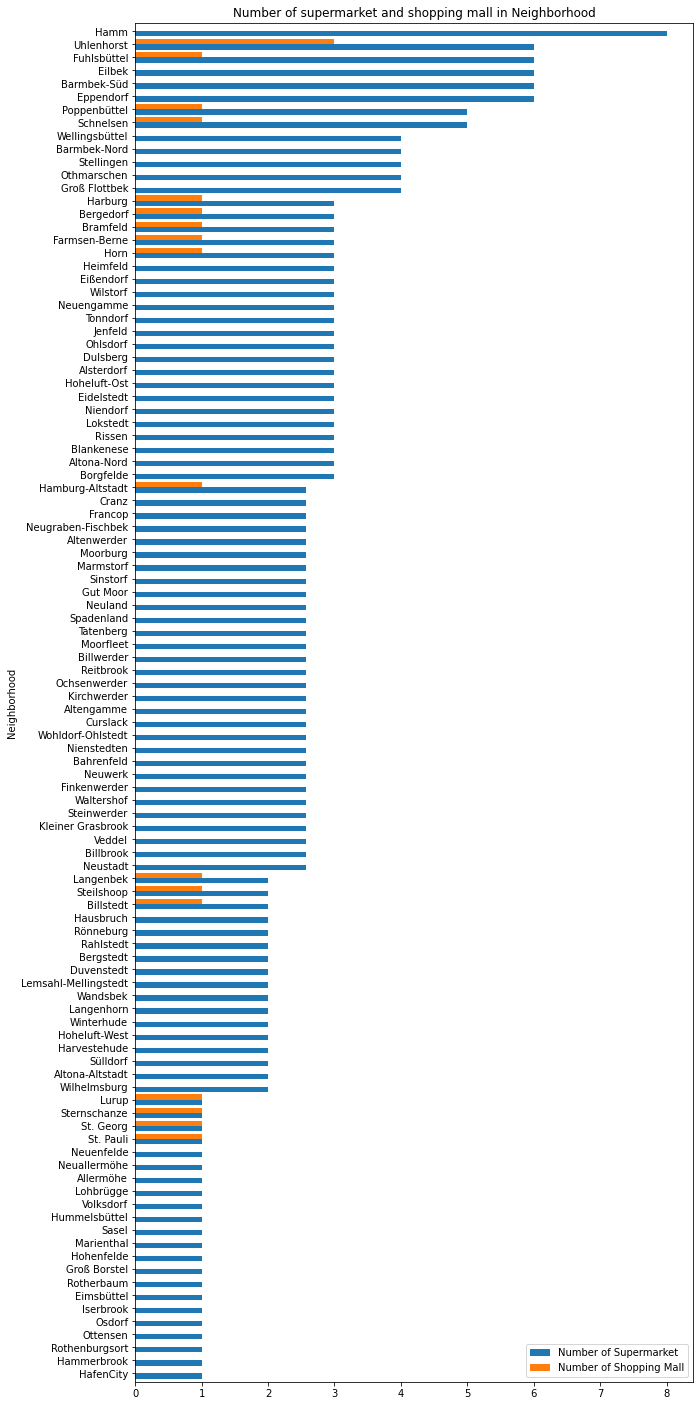

In [480]:
data_ss2[['Number of Supermarket', 'Number of Shopping Mall']].plot(kind='barh', figsize=(10, 25), width = 0.8)

#plt.xlabel('Borough') # add to x-label to the plot
plt.ylabel('Neighborhood') # add y-label to the plot
plt.title('Number of supermarket and shopping mall in Neighborhood') # add title to the plot
plt.yticks (np.arange(104), data_ss2['Neighborhood'])
plt.show()

In [481]:
data_ss2.head(10)

Neighborhood        Borough  Dencity of Population(people/km²)  \
1        HafenCity  Hamburg-Mitte                               2239   
5      Hammerbrook  Hamburg-Mitte                               1540   
11  Rothenburgsort  Hamburg-Mitte                               1241   
22        Ottensen         Altona                              12709   
27          Osdorf         Altona                               3690   
30       Iserbrook         Altona                               4231   
33      Eimsbüttel     Eimsbüttel                              17577   
34      Rotherbaum     Eimsbüttel                               5661   
44    Groß Borstel   Hamburg-Nord                               2321   
48      Hohenfelde   Hamburg-Nord                               9122   

     Latitude  Longitude  Number of Supermarket  Number of Shopping Mall  
1   53.541111  10.000278                    1.0                      0.0  
5   53.545278  10.030556                    1.0                      0.0  
11  53.535000  10.040833                    1.0                      0.0  
22  53.553889   9.917778                    1.0                      0.0  
27  53.572778   9.846667                    1.0                      0.0  
30  53.576389   9.823333                    1.0                      0.0  
33  53.575833   9.951667                    1.0                      0.0  
34  53.568056   9.988333                    1.0                      0.0  
44  53.613611   9.982500                    1.0                      0.0  
48  53.561667  10.020833                    1.0                      0.0

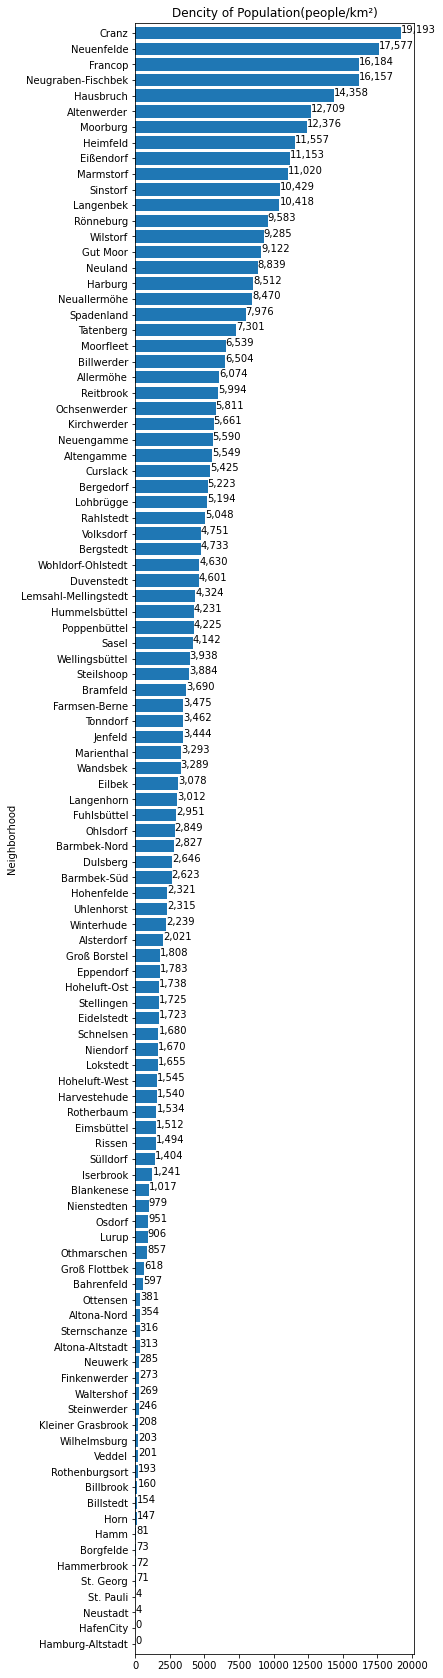

In [479]:
data_ss1['Dencity of Population(people/km²)'].plot(kind='barh', figsize=(5, 30), width = 0.8)

#plt.xlabel('Borough') # add to x-label to the plot
plt.ylabel('Neighborhood') # add y-label to the plot
plt.title('Dencity of Population(people/km²)') # add title to the plot
plt.yticks (np.arange(104), data_ss['Neighborhood'])

for index, value in enumerate(data_ss1['Dencity of Population(people/km²)']):
    label = format(int(value), ',')
    plt.annotate(label, xy=(value, index), color='black')
plt.show()

## 4.3 Cluster Analysis

In [486]:
data_cluster = data_ss.drop(['Neighborhood', 'Borough', 'Latitude', 'Longitude'], axis=1)
data_cluster.head()

Dencity of Population(people/km²)  Number of Supermarket  \
0                                979               2.567568   
1                               2239               1.000000   
2                               5549               2.567568   
3                               8839               1.000000   
4                               4733               1.000000   

   Number of Shopping Mall  
0                      1.0  
1                      0.0  
2                      0.0  
3                      1.0  
4                      1.0

In [487]:
from sklearn.preprocessing import StandardScaler
data_cluster = StandardScaler().fit_transform(data_cluster)
data_cluster

array([[-0.72639882,  0.        ,  1.79635381],
       [-0.43440786, -1.21133994, -0.40153791],
       [ 0.33264776,  0.        , -0.40153791],
       [ 1.0950686 , -1.21133994,  1.79635381],
       [ 0.14354885, -1.21133994,  1.79635381],
       [-0.59639332, -1.21133994, -0.40153791],
       [ 1.46353339,  0.33416274, -0.40153791],
       [ 1.26748231,  4.19791943, -0.40153791],
       [ 0.55395837,  0.33416274,  1.79635381],
       [ 0.00659119, -0.4385886 ,  1.79635381],
       [-0.88722559,  0.        , -0.40153791],
       [-0.66568324, -1.21133994, -0.40153791],
       [-0.71759274,  0.        , -0.40153791],
       [-0.60288201, -0.4385886 , -0.40153791],
       [-0.8962634 ,  0.        , -0.40153791],
       [-0.95234421,  0.        , -0.40153791],
       [-0.95327116,  0.        , -0.40153791],
       [-0.81492306,  0.        , -0.40153791],
       [-0.95234421,  0.        , -0.40153791],
       [ 1.46098426, -0.4385886 , -0.40153791],
       [ 2.79719051, -1.21133994,  1.796

To find the best K number:

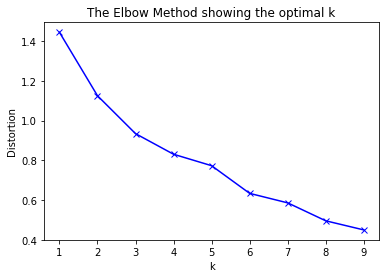

In [488]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np


distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(data_cluster)
    kmeanModel.fit(data_cluster)
    distortions.append(sum(np.min(cdist(data_cluster, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / data_cluster.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [489]:
# set number of clusters
kclusters = 3

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(data_cluster)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:103]

array([2, 0, 0, 2, 2, 0, 1, 1, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1,
       1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 2, 0, 0, 1, 1,
       0, 0, 0, 2, 0, 1, 1, 1, 0, 2, 0, 1, 0, 0, 0, 0, 2, 2, 2, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [ ]:
data_ss_final= data_ss.insert(0, 'Cluster Labels', kmeans.labels_)


In [508]:
data_ss.head(10)

Cluster Labels      Neighborhood        Borough  \
0               2  Hamburg-Altstadt  Hamburg-Mitte   
1               0         HafenCity  Hamburg-Mitte   
2               0          Neustadt  Hamburg-Mitte   
3               2         St. Pauli  Hamburg-Mitte   
4               2         St. Georg  Hamburg-Mitte   
5               0       Hammerbrook  Hamburg-Mitte   
6               1         Borgfelde  Hamburg-Mitte   
7               1              Hamm  Hamburg-Mitte   
8               2              Horn  Hamburg-Mitte   
9               2         Billstedt  Hamburg-Mitte   

   Dencity of Population(people/km²)   Latitude  Longitude  \
0                                979  53.550000  10.000000   
1                               2239  53.541111  10.000278   
2                               5549  53.551944   9.985556   
3                               8839  53.556944   9.963889   
4                               4733  53.555000  10.012222   
5                               1540  53.545278  10.030556   
6                              10429  53.554722  10.034444   
7                               9583  53.560833  10.057778   
8                               6504  53.553889  10.090000   
9                               4142  53.540556  10.101111   

   Number of Supermarket  Number of Shopping Mall  
0               2.567568                      1.0  
1               1.000000                      0.0  
2               2.567568                      0.0  
3               1.000000                      1.0  
4               1.000000                      1.0  
5               1.000000                      0.0  
6               3.000000                      0.0  
7               8.000000                      0.0  
8               3.000000                      1.0  
9               2.000000                      1.0

Now, it's time to create maps representing our clusters. The first map is illustrating the clusters where the radius of the Circle marker is proportional to a Number of supermarket in each neighborhood.

In [512]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)
colours = ['#77C2B9', '#9A7FB8', '#7A8A92']
# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster, income in zip(data_ss['Latitude'], data_ss['Longitude'], data_ss['Neighborhood'], data_ss['Cluster Labels'], data_cluster[:,1]):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius= 10,
        popup=label,
        #color=rainbow[cluster-1],
        color=colours[cluster],
        fill=True,
        #fill_color=rainbow[cluster-1],
        fill_color=colours[cluster],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [524]:

for lat, lng, Ladeeinrichtung in zip(data_fast_charging['Breitengrad [DG]'], data_fast_charging['Längengrad [DG]'], data_fast_charging['Steckertypen1']):
    label = '{}'.format(Ladeeinrichtung)
    label = folium.Popup(label, parse_html=True)
    folium.Marker(
        [lat, lng],
        popup=label,).add_to(map_clusters)   

map_clusters

Then we can see the map with population dencisty in each neighborhood

In [522]:
# create the second map
map_clusters_2 = folium.Map(location=[latitude, longitude], zoom_start=11)
colours = ['#4A8060', '#1760A0', '#C5B897']
# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the second map
markers_colors = []
for lat, lon, poi, cluster, income in zip(data_ss['Latitude'], data_ss['Longitude'], data_ss['Neighborhood'], data_ss['Cluster Labels'], data_ss['Dencity of Population(people/km²)']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=15,
        popup=label,
        #color=rainbow[cluster-1],
        color=colours[cluster],
        fill=True,
        #fill_color=rainbow[cluster-1],
        fill_color=colours[cluster],
        fill_opacity=0.7).add_to(map_clusters_2)
       

# add the fast charging station to the map
for lat, lng, Ladeeinrichtung in zip(data_fast_charging['Breitengrad [DG]'], data_fast_charging['Längengrad [DG]'], data_fast_charging['Steckertypen1']):
    label = '{}'.format(Ladeeinrichtung)
    label = folium.Popup(label, parse_html=True)
    folium.Marker(
        [lat, lng],
        popup=label,).add_to(map_clusters_2)  


map_clusters_2

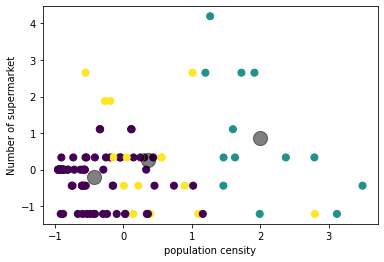

In [514]:
import matplotlib.pyplot as plt
y_kmeans = kmeans.predict(data_cluster)
plt.scatter(data_cluster[:, 0], data_cluster[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);
plt.xlabel('population censity')
plt.ylabel('Number of supermarket')
plt.show()

In [525]:
data_ss[(data_ss['Cluster Labels'] == 0)]

Cluster Labels          Neighborhood        Borough  \
1                 0             HafenCity  Hamburg-Mitte   
2                 0              Neustadt  Hamburg-Mitte   
5                 0           Hammerbrook  Hamburg-Mitte   
10                0             Billbrook  Hamburg-Mitte   
11                0        Rothenburgsort  Hamburg-Mitte   
12                0                Veddel  Hamburg-Mitte   
13                0          Wilhelmsburg  Hamburg-Mitte   
14                0     Kleiner Grasbrook  Hamburg-Mitte   
15                0           Steinwerder  Hamburg-Mitte   
16                0            Waltershof  Hamburg-Mitte   
17                0          Finkenwerder  Hamburg-Mitte   
18                0               Neuwerk  Hamburg-Mitte   
23                0            Bahrenfeld         Altona   
24                0         Groß Flottbek         Altona   
25                0           Othmarschen         Altona   
27                0                Osdorf         Altona   
28                0           Nienstedten         Altona   
29                0            Blankenese         Altona   
30                0             Iserbrook         Altona   
31                0              Sülldorf         Altona   
32                0                Rissen         Altona   
34                0            Rotherbaum     Eimsbüttel   
35                0          Harvestehude     Eimsbüttel   
37                0              Lokstedt     Eimsbüttel   
38                0              Niendorf     Eimsbüttel   
40                0            Eidelstedt     Eimsbüttel   
41                0            Stellingen     Eimsbüttel   
44                0          Groß Borstel   Hamburg-Nord   
45                0            Alsterdorf   Hamburg-Nord   
46                0            Winterhude   Hamburg-Nord   
48                0            Hohenfelde   Hamburg-Nord   
52                0              Ohlsdorf   Hamburg-Nord   
54                0            Langenhorn   Hamburg-Nord   
56                0              Wandsbek       Wandsbek   
57                0            Marienthal       Wandsbek   
58                0               Jenfeld       Wandsbek   
59                0              Tonndorf       Wandsbek   
63                0        Wellingsbüttel       Wandsbek   
64                0                 Sasel       Wandsbek   
66                0         Hummelsbüttel       Wandsbek   
67                0  Lemsahl-Mellingstedt       Wandsbek   
68                0            Duvenstedt       Wandsbek   
69                0     Wohldorf-Ohlstedt       Wandsbek   
70                0             Bergstedt       Wandsbek   
71                0             Volksdorf       Wandsbek   
72                0             Rahlstedt       Wandsbek   
73                0             Lohbrügge      Bergedorf   
75                0              Curslack      Bergedorf   
76                0            Altengamme      Bergedorf   
77                0            Neuengamme      Bergedorf   
78                0           Kirchwerder      Bergedorf   
79                0          Ochsenwerder      Bergedorf   
80                0             Reitbrook      Bergedorf   
81                0             Allermöhe      Bergedorf   
82                0            Billwerder      Bergedorf   
83                0             Moorfleet      Bergedorf   
84                0             Tatenberg      Bergedorf   
85                0            Spadenland      Bergedorf   
86                0          Neuallermöhe      Bergedorf   
88                0               Neuland        Harburg   
89                0              Gut Moor        Harburg   
90                0              Wilstorf        Harburg   
91                0             Rönneburg        Harburg   
93                0              Sinstorf        Harburg   
94                0             Marmstorf        Harburg   
95                0             Eißendorf    

In [526]:
data_ss[(data_ss['Cluster Labels'] == 1)]

Cluster Labels     Neighborhood        Borough  \
6                1        Borgfelde  Hamburg-Mitte   
7                1             Hamm  Hamburg-Mitte   
19               1  Altona-Altstadt         Altona   
21               1      Altona-Nord         Altona   
22               1         Ottensen         Altona   
33               1       Eimsbüttel     Eimsbüttel   
36               1    Hoheluft-West     Eimsbüttel   
42               1     Hoheluft-Ost   Hamburg-Nord   
43               1        Eppendorf   Hamburg-Nord   
49               1      Barmbek-Süd   Hamburg-Nord   
50               1         Dulsberg   Hamburg-Nord   
51               1     Barmbek-Nord   Hamburg-Nord   
55               1           Eilbek       Wandsbek   

    Dencity of Population(people/km²)   Latitude  Longitude  \
6                               10429  53.554722  10.034444   
7                                9583  53.560833  10.057778   
19                              10418  53.548889   9.947778   
21                              11153  53.563056   9.945278   
22                              12709  53.553889   9.917778   
33                              17577  53.575833   9.951667   
36                              19193  53.580000   9.967222   
42                              16157  53.584722   9.976111   
43                               9285  53.595556   9.983889   
49                              11557  53.580000  10.040556   
50                              14358  53.566667  10.050000   
51                              11020  53.605278  10.040000   
55                              12376  53.567778  10.045556   

    Number of Supermarket  Number of Shopping Mall  
6                     3.0                      0.0  
7                     8.0                      0.0  
19                    2.0                      0.0  
21                    3.0                      0.0  
22                    1.0                      0.0  
33                    1.0                      0.0  
36                    2.0                      0.0  
42                    3.0                      0.0  
43                    6.0                      0.0  
49                    6.0                      0.0  
50                    3.0                      0.0  
51                    4.0                      0.0  
55                    6.0                      0.0

In [527]:
data_ss[(data_ss['Cluster Labels'] == 2)]

Cluster Labels      Neighborhood        Borough  \
0                2  Hamburg-Altstadt  Hamburg-Mitte   
3                2         St. Pauli  Hamburg-Mitte   
4                2         St. Georg  Hamburg-Mitte   
8                2              Horn  Hamburg-Mitte   
9                2         Billstedt  Hamburg-Mitte   
20               2      Sternschanze         Altona   
26               2             Lurup         Altona   
39               2         Schnelsen     Eimsbüttel   
47               2        Uhlenhorst   Hamburg-Nord   
53               2       Fuhlsbüttel   Hamburg-Nord   
60               2     Farmsen-Berne       Wandsbek   
61               2          Bramfeld       Wandsbek   
62               2        Steilshoop       Wandsbek   
65               2      Poppenbüttel       Wandsbek   
74               2         Bergedorf      Bergedorf   
87               2           Harburg        Harburg   
92               2         Langenbek        Harburg   

    Dencity of Population(people/km²)   Latitude  Longitude  \
0                                 979  53.550000  10.000000   
3                                8839  53.556944   9.963889   
4                                4733  53.555000  10.012222   
8                                6504  53.553889  10.090000   
9                                4142  53.540556  10.101111   
20                              16184  53.561667   9.962222   
26                               5811  53.593056   9.882778   
39                               3289  53.633333   9.916667   
47                               8470  53.572500  10.018611   
53                               1723  53.634444  10.016111   
60                               4324  53.606389  10.119722   
61                               5223  53.608611  10.072500   
62                               7976  53.610278  10.059167   
65                               2951  53.659167  10.084722   
74                               3475  53.488056  10.212500   
87                               6539  53.459167   9.982778   
92                               5048  53.437222   9.986111   

    Number of Supermarket  Number of Shopping Mall  
0                2.567568                      1.0  
3                1.000000                      1.0  
4                1.000000                      1.0  
8                3.000000                      1.0  
9                2.000000                      1.0  
20               1.000000                      1.0  
26               1.000000                      1.0  
39               5.000000                      1.0  
47               6.000000                      3.0  
53               6.000000                      1.0  
60               3.000000                      1.0  
61               3.000000                      1.0  
62               2.000000                      1.0  
65               5.000000                      1.0  
74               3.000000                      1.0  
87               3.000000                      1.0  
92               2.000000                      1.0

# 5. Conclusion and Discussion

At the end, we could summerize our analysis result that: 

Cluster 0 is the major group, which has low population density, low number of supermarket and shopping mall;
Cluster 2 is the second large group, which has high population density, middle number of super market and high number of shoping mall; 
Cluster 1 is the last group, which has high population density, high number of supermarket, and low number of shopping mall. As we can see, most of existing fast charging stations are located in Cluster 1. 

In order to reach the target of public charging stations in next few years, the analysis result would suggest to have more publich fast charging stations in Cluster 2. 

But anyhow, there is also some space to imporve this work:
1. Foursquare API is not the best options to explore and get more information. This can result the errors in the final analysis results. Maybe next time, it is great to try with Google Maps API.
2. For fast publich charging stations, it is also a good idea to use API to get real-time charging station information.
3. Given we also have the normal charging station data, it is also great to initiate another project on this topic. 


Finally, I certainly appreciate this project which allows me to recap all the knowledges I have gained in this course.


# 6.Reference

Data: 
1. Hamburg borough and neighborhood data
    >data source: Wikipedia 

2. The coordinations for the neighborhood
    >data source: Foursquare API

3. The existinng fast charging stations in Hamburg
    >data source: Bundestnetsagentur: https://www.bundesnetzagentur.de/DE/Sachgebiete/ElektrizitaetundGas/Unternehmen_Institutionen/E-Mobilitaet/E-Mobilitaet-node.html  

4. The most popular venues/locations in Hamburg(assumming, there are the most visited public place, where people can access with e-cars.) The charging station shall be near by those places. 
    >data source: Foursquare
    
Literature:

[1]https://en.wikipedia.org/wiki/Electric_car_use_by_country

[2]https://elbe-hh.de/elbe/e-mobilitaet-in-hh

[3]https://www.bmvi.de/SharedDocs/DE/Anlage/G/masterplan-ladeinfrastruktur.pdf?__blob=publicationFile

[4]https://theicct.org/sites/default/files/publications/EV-charging-metrics-aug2020.pdf